# Работа с файлами,
или input/output файлов или просто i/o

### Начем издалека:
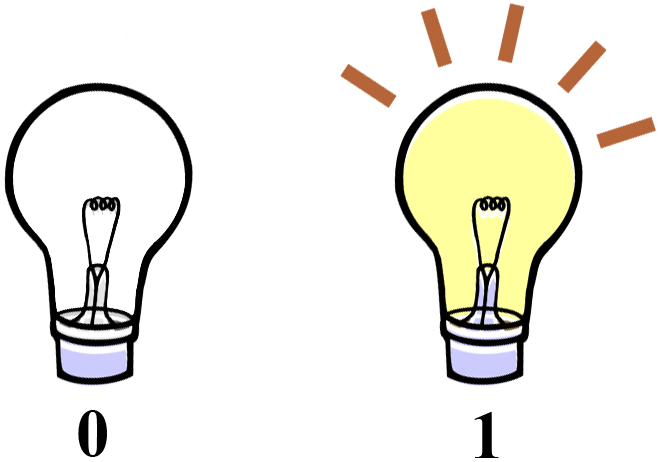!

Это простейшая (элементарная) единица информации -- бит.  
Бит может быть равен либо 0, либо 1. Соответственно, принимать/передавать он может только два состояния. Это мало, а посему неудобно для работы.

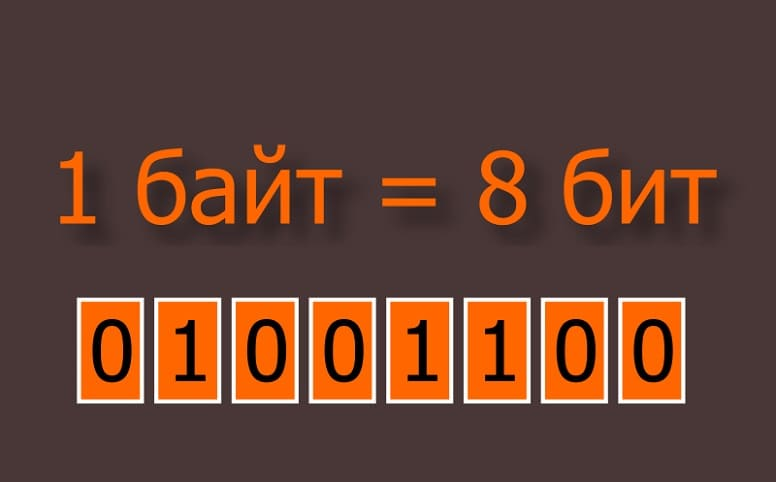!

Это байт -- функциональная единица информации.  
Как правило, в 99.9% случаев мы оперируем именно байтами и кодируем что-либо именно в байтах.

# ВОПРОС
### Сколько существует различных байтов?

# Кодировка
Баит может соответствовать какому-то определенному значению или символу и тд. Рассмотрим RGB кодирование.

## Рассмотрим такую задачку:
Цвет каждого пикселя на мониторе задается тремя целыми числами в формате Red,Green,Blue (RGB). То есть черный цвет закодирован как (0, 0, 0), а другие цвета -- в зависимости от необходимой интенсивности красного, зеленого и синего.

Есть два монитора с разными матрицами. У одного матрица 6 битная, то есть каждое из значений RGB закодировано 6 битами. У второго -- 8 битная, то есть каждый из трех цветов для каждого пикселя закодирован 8 пикселями. 

**ВОПРОС**<BR>
Во сколько раз цветов на втором мониторе больше чем на первом?

# КОДИРОВКА символов
Юникод (англ. Unicode) — стандарт кодирования символов, позволяющий представить знаки почти всех письменных языков. Представляемые в юникоде символы кодируются целыми числами без знака. Эти числа будем называть кодами символов в юникоде или просто UNICODE. Юникод имеет несколько форм представления символов в компьютере: UTF-8, UTF-16 (UTF-16BE, UTF-16LE) и UTF-32 (UTF-32BE, UTF-32LE). (Англ. Unicode transformation format - UTF).

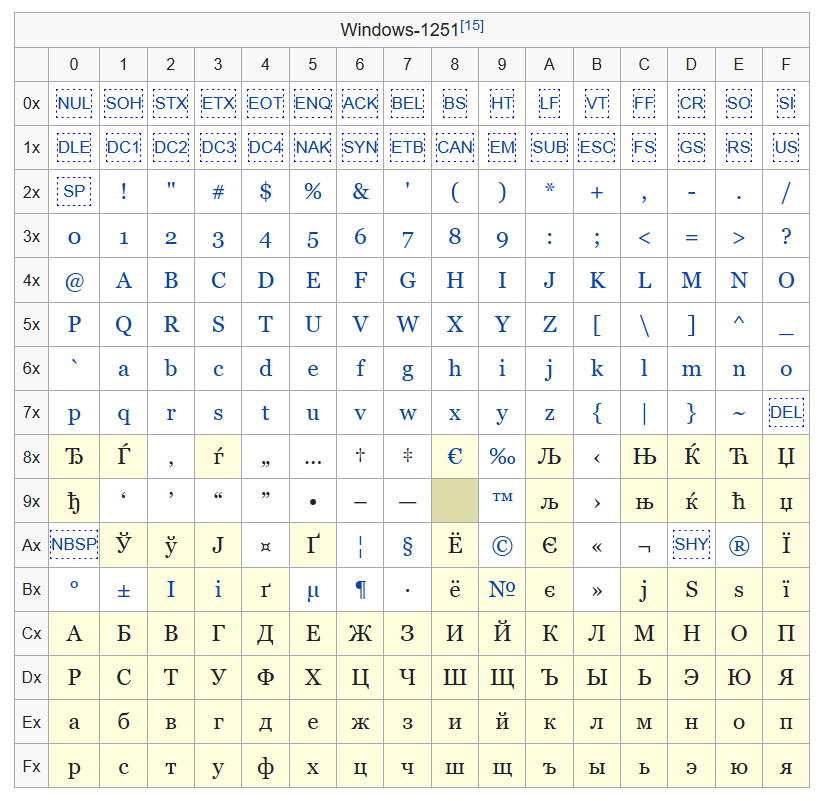

Привычная нам windows-1251 или **cp1251**. Кодировка для кириллицы.

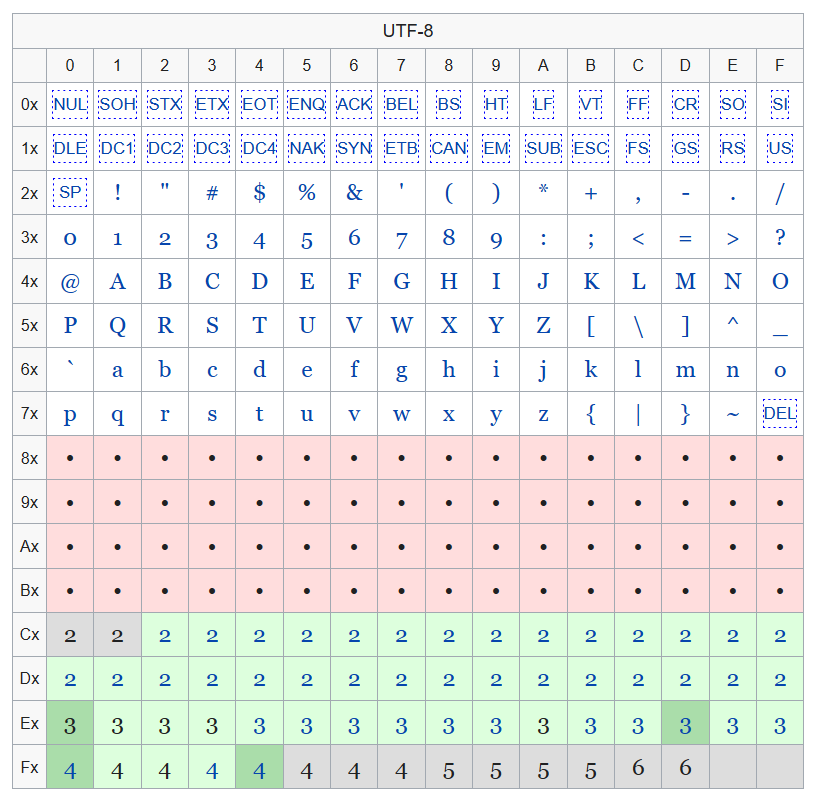

In [1]:
2 ** 16

65536

Топ-1 кодировка для WWW. Кириллица, как и другие редкие символы, кодируются в ней **двумя байтами**.

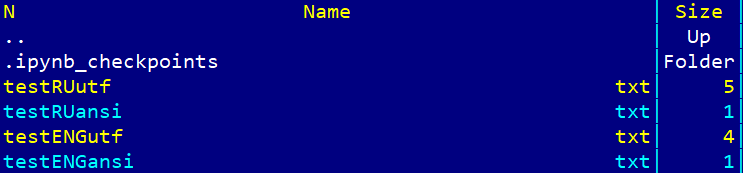

# ПУТЬ к файлу
* абсолютный: `C:/Users/username/folder/filename.txt`  
* относительный `filename.txt` или `../filename.txt` и тд  

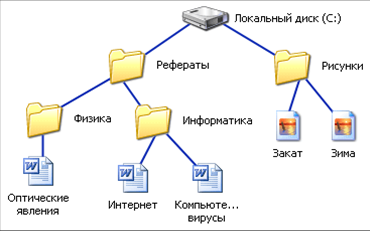!

Допустим, мы находимся в папке _Рефераты_. Тогда абсолютными путями будут являться:  
* `C:/Рефераты/Информатика/Интернет.doc`  
* `C:/Рисунки/Закат.jpg`  

а относительными:  
* `Информатика/Интернет.doc`
* `../Рисунки/Закат.jpg`

# Время кодинга
Последовательность действий:  
1. Открыть файл  
2. Сделать дела  
3. Закрыть файл  

In [2]:
file = open('data/weather_stats/sunshine.csv', 'r') # cp1251 (ANSI)
line = file.readline()
print(line) # обратим внимание на начало
file.close()

п»їCITIES;JAN;FEB;MAR;APR;MAY;JUN;JUL;AUG;SEP;OCT;NOV;DEC



In [3]:
file = open('data/weather_stats/sunshine.csv', 'r', encoding='utf-8') # key-word arugment
line = file.readline()
print(line)
file.close()

﻿CITIES;JAN;FEB;MAR;APR;MAY;JUN;JUL;AUG;SEP;OCT;NOV;DEC



In [4]:
file = open('data/weather_stats/sunshine.csv', 'r', encoding='utf-8')

for _ in range(5):
    line = file.readline()
    print(line)

file.close()

﻿CITIES;JAN;FEB;MAR;APR;MAY;JUN;JUL;AUG;SEP;OCT;NOV;DEC

ABILENE, TX;62;64;70;72;70;78;80;78;71;72;67;62

ALBANY, NY;46;52;54;54;56;60;64;61;57;52;37;39

ALBUQUERQUE, NM;72;72;73;77;79;83;76;75;79;79;76;71

ALLENTOWN, PA;43;48;53;46;53;62;57;61;58;57;49;45



In [5]:
# уберем пустоту 

file = open('data/weather_stats/sunshine.csv', 'r', encoding='utf-8')

for _ in range(5):
    line = file.readline()
    line = line.strip() # убираем пробельные символы с левого и правого концов строки
    print(line)

file.close()

﻿CITIES;JAN;FEB;MAR;APR;MAY;JUN;JUL;AUG;SEP;OCT;NOV;DEC
ABILENE, TX;62;64;70;72;70;78;80;78;71;72;67;62
ALBANY, NY;46;52;54;54;56;60;64;61;57;52;37;39
ALBUQUERQUE, NM;72;72;73;77;79;83;76;75;79;79;76;71
ALLENTOWN, PA;43;48;53;46;53;62;57;61;58;57;49;45


# Как НАДО открывать файлы
Контекстный менеджер `with`.

In [12]:
with open('data/weather_stats/sunshine.csv', 'r', encoding='utf-8') as inpfile:
    for _ in range(5):
        print(inpfile.readline().strip())

﻿CITIES;JAN;FEB;MAR;APR;MAY;JUN;JUL;AUG;SEP;OCT;NOV;DEC
ABILENE, TX;62;64;70;72;70;78;80;78;71;72;67;62
ALBANY, NY;46;52;54;54;56;60;64;61;57;52;37;39
ALBUQUERQUE, NM;72;72;73;77;79;83;76;75;79;79;76;71
ALLENTOWN, PA;43;48;53;46;53;62;57;61;58;57;49;45


In [7]:
# прочитать файл целиком

with open('data/weather_stats/sunshine.csv', 'r', encoding='utf-8') as inpfile:
    lines = inpfile.readlines()
    
print(lines[:5])
print(len(lines))

['\ufeffCITIES;JAN;FEB;MAR;APR;MAY;JUN;JUL;AUG;SEP;OCT;NOV;DEC\n', 'ABILENE, TX;62;64;70;72;70;78;80;78;71;72;67;62\n', 'ALBANY, NY;46;52;54;54;56;60;64;61;57;52;37;39\n', 'ALBUQUERQUE, NM;72;72;73;77;79;83;76;75;79;79;76;71\n', 'ALLENTOWN, PA;43;48;53;46;53;62;57;61;58;57;49;45\n']
170


In [13]:
# итерация файла по строкам

with open('data/weather_stats/sunshine.csv', 'r', encoding='utf-8') as inpfile:
    for i, line in enumerate(inpfile):
        print(line.strip())
        if i == 5:
            break # чтобы не печатать всё сразу завершим цикл

﻿CITIES;JAN;FEB;MAR;APR;MAY;JUN;JUL;AUG;SEP;OCT;NOV;DEC
ABILENE, TX;62;64;70;72;70;78;80;78;71;72;67;62
ALBANY, NY;46;52;54;54;56;60;64;61;57;52;37;39
ALBUQUERQUE, NM;72;72;73;77;79;83;76;75;79;79;76;71
ALLENTOWN, PA;43;48;53;46;53;62;57;61;58;57;49;45
ALPENA, MI;36;45;53;52;59;63;65;59;51;42;28;28


# Запись в файл

In [9]:
with open('newfile.txt', 'w', encoding='utf-8') as outfile:
    for i in range(5):
        outfile.write(i)

TypeError: write() argument must be str, not int

In [14]:
with open('newfile.txt', 'w', encoding='utf-8') as outfile:
    for i in range(5):
        outfile.write(str(i))
    
# забыли переносить строки


In [15]:
with open('newfile.txt', 'w', encoding='utf-8') as outfile:
    for i in range(5):
        outfile.write(str(i) + '\n')

In [16]:
with open('newfile.txt', 'w', encoding='utf-8') as outfile:
    for i in range(5):
        outfile.write(f"{i}\n")

#### Задачка 1.

Дан файл с оценками `grades_easy.csv`, где в двух колонках через пробел сначала записано имя учеников, потом оцена.<br>
В новый файл `taskIO1.csv`, запишите информацию в виде имя ученика и его оценка. Разделитель -- запятая.<br>

Правила выставления оценок:<br>
- **A**, если среднее 90 баллов и более;
- **B**, если кол-во баллов от 75 и выше;
- **С**, если баллов >= 60;
- **D**, если от 50;
- **F** иначе.

In [18]:
with open("data/grades_easy.csv", "r", encoding='utf-8') as inpfile:
    with open("taskIO1.csv", "w", encoding='utf-8') as outfile:
        for line in inpfile:
            line = line.strip()
            # name, points = line.split()
            line = line.split()
            name = line[0]
            points = int(line[1])
            
            if points >= 90:
                mark = 'A'
            elif points >= 75:
                mark = 'B'
            elif points >= 60:
                mark = 'C'
            elif points >= 50:
                mark = 'D'
            else:
                mark = 'F'
                
            outfile.write("{},{}\n".format(name, mark))

# Эпилог :)
## Pathlib
В python есть модуль pathlib, делающий работу с путями более удобной и продвинутой.

In [ ]:
import pathlib
prefix = pathlib.Path('data')
prefix

In [ ]:
newfile2 = prefix / 'new_file2.txt'
newfile2

In [ ]:
newfile2.resolve() # сделать путь абсолютным # не in place

`Pathlib` позволяет удобно проверять наличие файлов по указанному пути, определять, находится ли по данному пути файл, или папка, или вообще ничего, создавать и удалять директории и тд. Такой же функционал есть в модуле `os`, но в `pathlib` он реализован удобнее.  
Можете приучать себя к тому, чтобы пользоваться `pathlib`, но, честно говоря, на практике нам не нужны какие-то умные взаимдействия с путями, так что в `pathlib` необходимости часто нет.